#  Model Selection for Gaussian Mixture Models  (--to be completed--)

# Introduction

The model selection problem for Gaussian mixture models, ie. determining the number of clusters, is still an open research problem.  The maximum likelihood principle is widely used for parameter estimation in science and engineering, however, maximum likelihood is unsuited to the model selection task.  The problem is that the likelihood of a model can be increased by simply increasing the number of its parameters (i.e. increasing the model's complexity) which improves its fit to the data but leads to overfitting and poor generalization. Several alternative methods have been developed, therefore, for the problem of model order determination. In statistical signal processing the most widely used methods are the information theoretic criteria, while in physics and astronomy Bayesian methods are prefered. In this project I study the performance of both information theoretic and Bayesian model selection procedures when applied to determining the number of clusters for Gaussian mixture models.

*more about this project needs to be added here* .This project was inspired by examples provided by the scikit-learn package and the code provided there has been modified and used here.

## Information Theoretic Model Selection

Akaike's Information Criterion (AIC) is a frequentist model selection procedure that was the first of those based on an information theoretic quantitty,  the Kullback-Leibler divergence. AIC quantifies the correctness of a model in a relative rather than an absolute sense. Given a set of candidate models it assigns a value to each to quantify which one out of this set is the most likely. AIC works by creating a new measure by adding a penality term to the likelihood that increases as the model complexity increases. This new term decreases as the model complexity increases and therefore has the effect of countering the increasing likelhood. The selected model out of a set is the one that gives the maximum of the AIC value. These days Bayesian Information Criterion, a derivatve of AIC, is more widely used, at least in statistical signal processing, so I describe its theory in the next section.

### Bayesian Information Critierion (BIC)

The Bayesian Information Criterion is the most widely used information theoretic model selection procedure. Despite the name it has both a Bayesian and a frequentist justification [1]. The BIC is given by:


\begin{equation}
\text{BIC} = \ln(n)k - 2\ln(\hat{L})
\end{equation}

Where
1. $\hat{L}$ is the maximized likelihood function $\hat{L} = p(x \mid \hat{\theta})$ of model $M$ and  $\hat{\theta}$ is the maximum likehood estimate of the parameter given the data $x$.
* n is the number of data points
* k is the number of free parameters

The BIC is therefore formed from the negative log likelihood. Increasing the number of parameters decreases this negative log likelihood of the data. Unchecked, the model will eventually start fitting the noise rather than the underlying signal. The BIC, however, adds a penalty term that increases with the number of parameters to balance this effect. This penalty term depends on both the number of parameters and the number of data points. As the number of parameters in the model increases the penalty term begins to increases the BIC value. Given a set of models we select the one model with the lowest value of the BIC.

# Gaussian Mixtures with the EM Algorithm

## Paramater Estimation using EM

A Gaussian mixture is multi-modal distribution that takes the form of a linear superposition of $K$ Gaussians, each with a mean $\mu_k$ and covariance matrix $ \Sigma_k$

\begin{equation}
p(x) = \sum_{k=1}^K \pi_k \mathcal{N}( \mathbf{x} \mid \mathbf{\mu}_k, \mathbf{\Sigma}_k) 
\end{equation}

Where $\pi_k$, are the mixing coefficients, i.e, the probablities a sample $\mathbf{x}$ is generated by the $k$-th Gaussian sub distribution of the mixture. The latent variable $\mathbf{z}$ is a $K$ dimensional variable in which one element, $z_k$, is equal to one and all the others are zero, i.e. $z_k \in \{0,1 \}$ and $\sum z_k = 1$. $z_k$ indicates which Gaussian of the mixture the data point $x$ was generated by.  There is set of observations $\{\mathbf{x}_1, \ldots \mathbf{x}_N   \}$ and a correspoding set of latent variables $\{\mathbf{z}_1, \ldots \mathbf{z}_N \}$. If we assume our observations were i.i.d. draws from the Gaussian mixture model the log likelihood of our data is given by:

\begin{equation}
\ln p(\mathbf{X} \mid \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \sum_{n=1}^N \ln \bigg \{  \sum_{k=1}^K \pi_k \mathcal{N}( \mathbf{x}_n \mid \mathbf{\mu}_k, \mathbf{\Sigma}_k)  \bigg \} 
\end{equation}

An important quantity is the condtional probability of $\mathbf{z}$ given an observation $\mathbf{x}$, the so-called responsibility $\gamma$, given by:

\begin{equation}
\gamma ( z_k) \equiv  p (z_k =1 \mid \mathbf{x}) =  \frac{\pi_k \mathcal{N}(\mathbf{x} \mid \mathbf{\mu}_k, \mathbf{ \Sigma}_k  )} { \sum_{j=1}^K \pi_j \mathcal{N} (\mathbf{x} \mid \mathbf{\mu}_j, \mathbf{\Sigma}_j ) }
\end{equation}

The latent variable $z_k$ identifies which of the $K$ gaussian clusters the observation falls in. From the log likelihood and the responsibilty, expressions for the following four quantities can be derived. The mean, $\mu_k$:

\begin{equation}
\mathbf{\mu}_k = \frac{1}{N_k} \sum_{n=1}^N \gamma (z_{nk}) \mathbf{x}_n
\end{equation}

Where $N_k$ is the effective number of points assigned to cluster $k$ defined by:

\begin{equation}
N_k = \sum_{n=1}^N \gamma (z_{nk})
\end{equation}

The covariance matrix for cluster $k$:

\begin{equation}
\mathbf{ \Sigma}_k =  \frac{1}{N_k} \sum_{n=1}^N \gamma (z_{nk}) (\mathbf{x}_n - \mathbf{ \mu}_k) (\mathbf{x}_n - \mathbf{ \mu}_k)^T
\end{equation}

And the mixing coefficients $\pi_k$

\begin{equation}
\pi_k = \frac{N_k}{N}
\end{equation}

The log likelihood of the complete (i.e. both $\mathbf{X}$ and $\mathbf{Z}$)  data is:

\begin{equation}
p( \mathbf{X}, \mathbf{Z} \mid \boldsymbol{\mu}, \boldsymbol{\Sigma}, \boldsymbol{\pi}) = \prod_{n=1}^N \prod_{k=1}^K \pi_{k}^{z_{nk}} \mathcal{N} (\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)^{z_{nk}}
\end{equation}

And, after taking logs, from this the log likelihood:

\begin{equation}
\ln p( \mathbf{X}, \mathbf{Z} \mid \boldsymbol{\mu}, \boldsymbol{\Sigma}, \boldsymbol{\pi}) = \sum_{n=1}^N \sum_{k=1}^K z_{nk} \{ \ln  \pi_k + \ln \mathcal{N} (\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k )
\end{equation}

This is the quantity we maximize to obtain ML estimates, however we do not have the latent variables so cannot carry out a direct maximization. Therefore, in the $E$ step of the $EM$ algorithm we first form the expectation of the log likelhood with respect to the posterior distribution of the latent variables, and in the $M$ step we maximize this quantity, labeled $Q$, rather than the complete log likelihood. The posterior distribution of thet latent variables we need is given by:

\begin{equation}
p( \mathbf{Z} \mid \mathbf{X}, \boldsymbol{\mu}, \boldsymbol{\Sigma}, \boldsymbol{\pi}) \propto \prod_{n=1}^N \prod_{k=1}^K[ \pi_k  \ln \mathcal{N} (\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k ]^{z_{nk}} 
\end{equation}

The expected value of the indicator variable $z_{nk}$ under this distribution is given by:

\begin{equation}
\mathbb{E}[z_{nk}] = \frac{\pi_k \mathcal{N}(\mathbf{x}_n \mid \mathbf{\mu}_k, \mathbf{ \Sigma}_k  )} { \sum_{j=1}^K \pi_j \mathcal{N} (\mathbf{x}_n \mid \mathbf{\mu}_j, \mathbf{\Sigma}_j ) } =  \gamma (z_{nk})
\end{equation}

Taking the expectation of the complete log likelihood with rest to this same distrition we obtain the quantity we maximize in the $M$ step:

\begin{equation}
\mathbb{E}_{\mathbf{z}} [ \ln p( \mathbf{X}, \mathbf{Z} \mid \boldsymbol{\mu}, \boldsymbol{\Sigma}, \boldsymbol{\pi}) ] = \sum_{n=1}^N \sum_{k=1}^K  \gamma(z_{nk}) \{ \ln  \pi_k + \ln \mathcal{N} (\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k ) \}
\end{equation}

The $EM$ algorithm consist of two steps that are repeated until convergence. At convergence the maximum of the likelhood is attained and the parameters thereby obtained are the maximum likelihood estimates. In the $E$ step the responsbilities are computed and the expectation w.r.t the posterior likelihood of the latent variables of the log likelihood is calculated. In the $M$ step the posterior is held constant and the $Q$ quantity is maximized to update the estimates for the parameters $\boldsymbol{\mu}$, $\boldsymbol{\Sigma}$, and $\boldsymbol{\pi}$.

# Data Analysis - BIC and Gaussian Mixtures

In [952]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn import datasets
from sklearn.preprocessing import scale
import pandas as pd

#plt.style.use('seaborn-white')
import seaborn as sns
sns.set()
#sns.set_style("whitegrid")
#sns.set_context("poster")

In [953]:
def plot_ellipses(ax1, weights, means, covars):
    for n in range(means.shape[0]):
        eig_vals, eig_vecs = np.linalg.eigh(covars[n])
        unit_eig_vec = eig_vecs[0] / np.linalg.norm(eig_vecs[0])
        angle = np.arctan2(unit_eig_vec[1], unit_eig_vec[0])
        # Ellipse needs degrees
        angle = 180 * angle / np.pi
        # eigenvector normalization
        eig_vals = 2 * np.sqrt(2) * np.sqrt(eig_vals)
        ell = mpl.patches.Ellipse(means[n], eig_vals[0], eig_vals[1],
                                  180 + angle)
        ell.set_clip_box(ax1.bbox)
        ell.set_alpha(weights[n])
        ell.set_facecolor('#56B4E9')
        ax1.add_artist(ell)

In [954]:
def plot_BayesGMM_results(ax1, ax2, estimator, X, title, xlimit, ylimit):
    ax1.set_title(title)
    ax1.scatter(X[:, 0], X[:, 1], s=5, marker='o', alpha=0.8)
    ax1.set_xlim(0, xlimit)
    ax1.set_ylim(0, ylimit)
    ax1.set_xticks(())
    ax1.set_yticks(())
    plot_ellipses(ax1, estimator.weights_, estimator.means_,
                 estimator.covariances_)

    ax2.get_xaxis().set_tick_params(direction='out')
    ax2.yaxis.grid(True, alpha=0.7)
    for k, w in enumerate(estimator.weights_):
        ax2.bar(k - .45, w, width=0.9, color='#56B4E9', zorder=3)
        ax2.text(k, w + 0.007, "%.1f%%" % (w * 100.),
                 horizontalalignment='center')
    ax2.set_xlim(-.6, 2 * n_components - .4)
    ax2.set_ylim(0., 1.1)
    ax2.tick_params(axis='y', which='both', left='off',
                    right='off', labelleft='off')
    ax2.tick_params(axis='x', which='both', top='off')

    #if plot_title:
    ax1.set_ylabel('Estimated Mixtures')
    ax2.set_ylabel('Weight of each component')
        
# Parameters of the dataset
random_state, n_components, n_features = 2, 3, 2

samples = np.array([200, 500, 200])
#colors = np.array(['#0072B2', '#F0E442', '#D55E00'])

In [955]:
def plot_GMM_results(ax1, estimator, data, lim, title):
    ax1.set_title(title)
    ax1.scatter(data[:, 0], data[:, 1], s=5, marker='o', alpha=0.8)
    ax1.set_xticks(())
    ax1.set_yticks(())
    plot_ellipses(ax1, estimator.weights_, estimator.means_,
                 estimator.covariances_)
    plt.show()

## The Iris Dataset

In [956]:
# import some data 
iris = datasets.load_iris()

# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


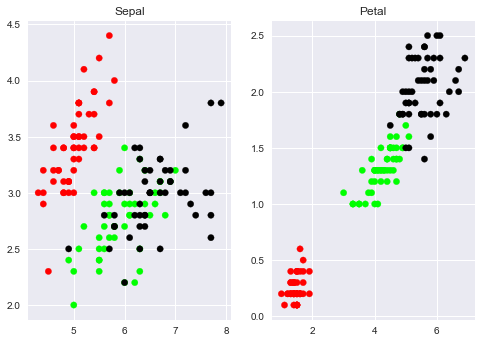

In [957]:
# Set the size of the plot
#plt.figure(figsize=(10,5))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')
plt.show()

In [958]:
X_iris =np.array(x.Petal_Length)
X_iris = X_iris[:, None]
Y_iris =np.array(x.Petal_Width)
Y_iris = Y_iris[:, None]
iris_array = np.concatenate([X_iris, Y_iris], 1)


X = iris.data  
#y = iris.target
no_clust = [1, 2, 3, 4, 5, 6, 7, 8]
clfs_iris = [GaussianMixture(N, covariance_type = 'full', max_iter=50).fit(iris_array)
            for N in no_clust]
np.shape(clfs_iris)



(8,)

In [959]:
totalpoints = len(X)
print(totalpoints)

150


In [960]:
BICs = np.array([clf.bic(iris_array) for clf in clfs_iris]) 
print( "%i points convergence:" % totalpoints, [clf.converged_ for clf in clfs_iris])

150 points convergence: [True, True, True, True, True, True, True, True]


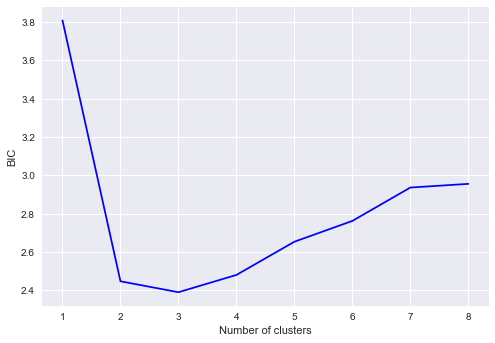

In [961]:
plt.plot(no_clust, BICs / totalpoints, c='b',
                    label="N=%i" % totalpoints)
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

In [962]:
clf_iris = clfs_iris[np.argmin(BICs)]
print(clf_isis)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=500,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


In [963]:
X_iris =np.array(x.Petal_Length)
X_iris = X_iris[:, None]
Y_iris =np.array(x.Petal_Width)
Y_iris = Y_iris[:, None]
iris_array = np.concatenate([X_iris, Y_iris], 1)
#np.shape(iris_array)

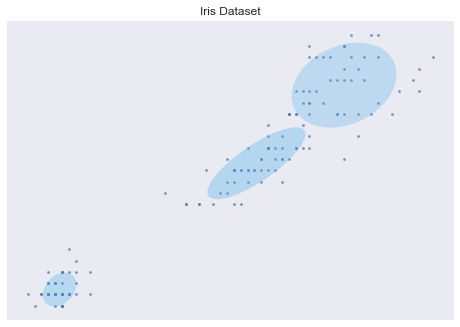

In [964]:
#clf_old.n_components = 4
type(iris_array)
#plt.figure(figsize =(10, 10))
type(plt.subplot())
plot_GMM_results(plt.subplot(), clf_iris, iris_array, 50, 'Iris Dataset')

## The Old Faithful Dataset

In [965]:
old = pd.read_csv("c:/users/jamil/broenlee/Old_Faithful_Data.csv")

In [966]:
old.columns

Index(['wait_time', 'duration_mins', 'duration_sec'], dtype='object')

In [967]:
old.head(5)

,wait_time,duration_mins,duration_sec
0,71,4.02,241
1,57,2.15,129
2,80,4.00,240
3,75,4.00,240
4,77,4.00,240


In [968]:

Xold= np.array(old.wait_time)
Xold=Xold[:, np.newaxis]
Yold = np.array(old.duration_sec)
Yold= Yold[:, np.newaxis]
np.shape(Xold)

(298, 1)

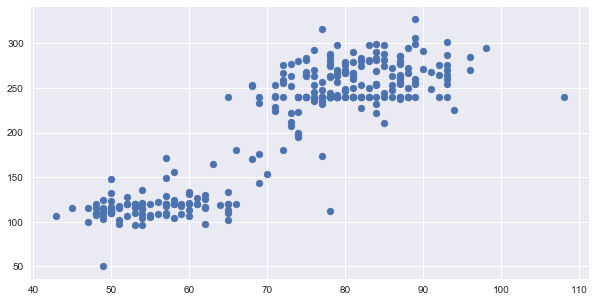

In [969]:
plt.figure(figsize=(10,5))
plt.scatter(Xold,  Yold )
plt.show()

In [970]:
old.columns
oldarray = np.concatenate([old.wait_time.values[:, None], old.duration_sec.values[:, None]], 1)
np.shape(oldarray)
#print(oldarray)

(298, 2)

150 points convergence: [True, True, True, True, True, True, True, True]


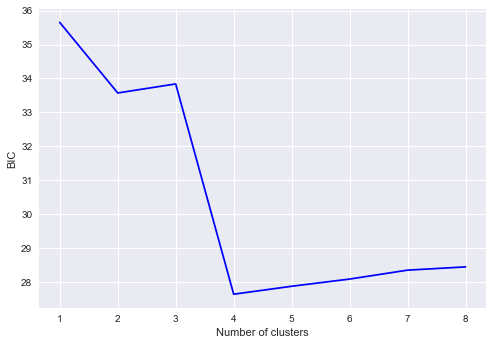

In [971]:
clfs_old = [GaussianMixture(N, max_iter=50).fit(oldarray)
            for N in no_clust]
BICs = np.array([clf.bic(oldarray) for clf in clfs_old]) 
print( "%i points convergence:" % totalpoints, [clf.converged_ for clf in clfs_old])
plt.plot(no_clust, BICs / totalpoints, c='b',
                    label="N=%i" % totalpoints)
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

In [972]:
clf_old = clfs_old[1]#np.argmin(BICs)]
print(clf_old)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=50,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


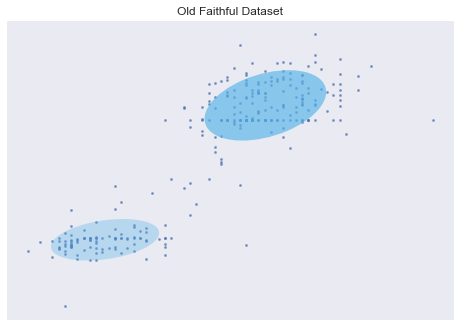

In [973]:
#clf_old.n_components_ = 2
type(oldarray)
np.shape(oldarray)
#plt.figure(figsize =(10, 10))
type(plt.subplot())
plot_GMM_results(plt.subplot(), clf_old, oldarray, 350, 'Old Faithful Dataset')

## The Ruspini Dataset

In [974]:
rusp = pd.read_csv("c:/users/jamil/broenlee/ruspini2.csv")

In [975]:
rusp.head()

,zero,one
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49


In [976]:
rusparray = np.concatenate([rusp.zero.values[:, None], rusp.one.values[:, None]], 1)
Xrusp = np.array(rusp.zero)
Xrusp = Xrusp[:, np.newaxis]
Yrusp = np.array(rusp.one)
Yrusp = Yrusp[:, np.newaxis]
np.shape(rusparray)
#print(Yrusp)

(75, 2)

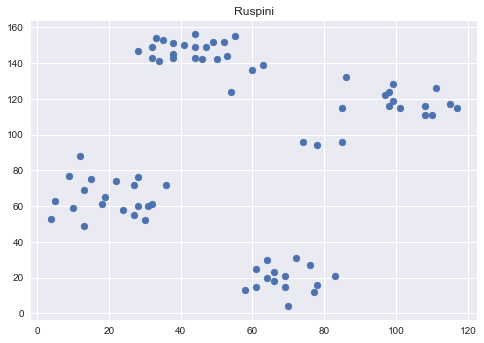

In [977]:
plt.scatter(Xrusp,  Yrusp )
plt.title('Ruspini')
plt.show()

150 points convergence: [True, True, True, True, True, True, True, True]


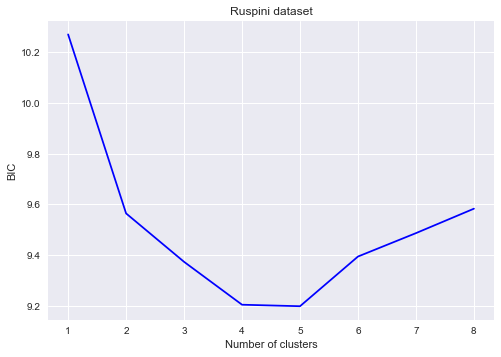

In [978]:
clfs_rusp = [GaussianMixture(N, max_iter=50).fit(rusp)
            for N in no_clust]
BICs = np.array([clf.bic(rusp) for clf in clfs_rusp]) 
print( "%i points convergence:" % totalpoints, [clf.converged_ for clf in clfs_rusp])
plt.plot(no_clust, BICs / totalpoints, c='b',
                    label="N=%i" % totalpoints)
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('Ruspini dataset')
plt.show()

In [979]:
clf_rusp = clfs_rusp[np.argmin(BICs)]
print(clf_rusp)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=50,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


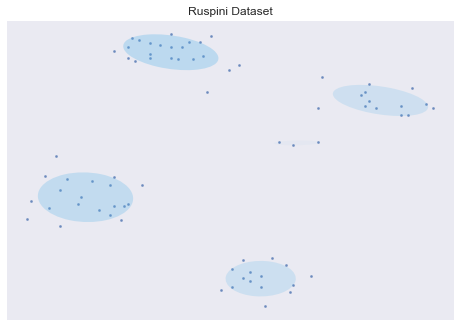

In [980]:
type(rusparray)
np.shape(rusparray)
#plt.figure(figsize =(10, 10))
type(plt.subplot())
plot_GMM_results(plt.subplot(), clf_rusp, rusparray, 175, 'Ruspini Dataset')

# Variational Bayes Mixture Modelling

In the $EM$ algorithm our objective was to maximize the log likelihood of the data and to extract the parameters at the maximum of the likelihood. In the Bayesian our objective is to obtain the posterior probability of the parameters $\boldsymbol{\theta}$ and the latent variables $\boldsymbol{Z}$. Now, however, parameters are also described by probability density functions so we subsume them into the latent variables. The information theoretic derviation of the (frequentist) expectation maximization method can also be used to derive the variational Bayesian method for mixture modelling. Though now the parameters, $\boldsymbol{\theta}$, have an an asoccisate probability distribution and so now are lumped with the latent variables $\mathbf{Z}$. The variational Bayes (VB) method is useful for large data problems which have a heavy computational burden and therefore can be intractable. Of course being a Bayesian method it also allows the easy incorporation of prior information.  In order to obtain a tractable solution the VB method assumes a factorized form for the distribution of the latent variables (and hence aslo the parameters) of the form:

\begin{equation}
q (\mathbf{Z}) = \prod_{i=1}^M q_i (\mathbf{Z}_i)
\end{equation}

The actual distribution may not be factorizable in this manner but we choose such a form in order to obtain a tractable problem. In the EM method our aim is to maximize the likelihood of our data. In variational bayes, on the other hand, our aim is to obtain the posterior probability of the latent variables,$p( \mathbf{Z} \mid \mathbf{X})$, and the evidence, $ p(\mathbf{X}) $. The posterior distribution may not be factorizable in this manner therefore the variational method is in general an approximate method. The conditional distribution of $\boldsymbol{Z}$ given the mixing coefficients $\boldsymbol{\pi}$ can written as:

\begin{equation}
p(\mathbf{Z} \mid \boldsymbol{\pi}) = \prod_{n=1}^N \prod_{k=1}^K \pi_k^{z_{nk}}
\end{equation}

And the condtional distribution of $\boldsymbol{X}$ given the latent variables and the parameters:

\begin{equation}
p (\mathbf{X} \mid \mathbf{Z}, \boldsymbol{\mu}, \boldsymbol{\Lambda}) = \prod_{n=1}^N \prod_{k=1}^K \mathcal{N}(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \mathbf{\Lambda}^{-1}_k)^{z_{nk}}
\end{equation}


Where $ \boldsymbol{\mu} = \{ \boldsymbol{\mu}_k \}$ and $ \boldsymbol{\Lambda} = \{ \boldsymbol{\Lambda}_k \}$ are the means and the precisions of the Gaussians, respectively. 

### Priors on $\pi$

##### Dirichelet Distribution

We now introduce the prior distributions on the parameters. For the mixing coefficents we assume a Dirichelet distribution:

\begin{equation}
p(\boldsymbol{\pi}) = \text{Dir} (\boldsymbol{\pi} \mid \boldsymbol{\alpha}_0 ) = \prod_{k=1}^K \pi_k^{\alpha_0 -1}
\end{equation}

#### Dirichelet Process

### Priors on $\mu$ and $ \Lambda$

The mean and the precision are described by a Gaussian-Wishart prior:

\begin{equation}
p( \mathbf{\mu}, \mathbf{\Lambda}) = p(\mathbf{\mu} \mid \mathbf{\Lambda}) p(\mathbf{\Lambda}) = \prod_{k=1}^K \mathcal{N} (\boldsymbol{\mu}_k \mid \mathbf{m}_0, ( \beta_0 \mathbf{\Lambda}_0)^{-1} ) \mathcal{W} (\mathbf{\Lambda}_k \mid \mathbf{W}_0, \nu_0 )
\end{equation}

### Posteriors

We now consider the parameters we wish to estimate. Their joint distribution is given by:

\begin{equation}
p(\mathbf{X}, \mathbf{Z}, \boldsymbol{\pi}, \boldsymbol{\mu}, \mathbf{\Lambda}) = p(\mathbf{X} \mid \mathbf{Z}, \boldsymbol{\mu}\ \mathbf{\Lambda}) p(\mathbf{Z} \mid \boldsymbol{\pi}) p(\boldsymbol{\pi}) p(\boldsymbol{\mu} \mid \mathbf{\Lambda}) p(\mathbf{\Lambda})
\end{equation}

The factorization we assume for the distribution of the parameters we wish to estimate is:

\begin{equation}
q(\mathbf{Z}, \boldsymbol{\pi}, \boldsymbol{\mu}, \mathbf{\Lambda}) = q(\mathbf{Z}) q(\boldsymbol{\pi}, \boldsymbol{\mu}, \mathbf{\Lambda})
\end{equation}

#### First Posterior

Considering first the  $q(\boldsymbol{Z})$ factor. It can be shown that with $\rho_{nk}$ defined as follows:

\begin{equation}
\ln \rho_{nk} =  \mathbb{E}[\ln \pi_k] + \frac{1}{2}\mathbb{E}[ \ln | \boldsymbol{\Lambda}_k |] - \frac{D}{2} \ln (2\pi) - \frac{1}{2} \mathbb{E}_{\mu_k, \Lambda_k}[ (\mathbf{x}_n - \boldsymbol{\mu}_k)^T \boldsymbol{\Lambda}_k(\mathbf{x}_n - \boldsymbol{\mu}_k) ]
\end{equation}

The $q(\boldsymbol{Z})$ factor can we written as:

\begin{equation}
q^*( \mathbf{Z}) = \prod_{n=1}^N \prod_{k=1}^K r_{nk}^{z_{nk}}
\end{equation}

Defining $r_{nk}$ as:

\begin{equation}
r_{nk} = \frac{ \rho_{nk}}{ \sum_{j=1}^K \rho_{nj}}
\end{equation}

For the discrete distribution $q^*(\boldsymbol{Z})$:

\begin{equation}
\mathbb{E} [{z_nk}] = r_{nk}
\end{equation}

Therefore the quantities $r_{nk}$ play the same role in variational bayes that the responbilities play in the $EM$ algorithm. Using the $r_{nk}$ we define three quantities analagous to quantities used in the $EM$ algorithm:

\begin{equation}
N_k = \sum_{n=1}^N r_{nk}
\end{equation}

\begin{equation}
\bar{\mathbf{x}}_k = \frac{1}{N_k} \sum_{n=1}^N r_{nk} \mathbf{x}_n
\end{equation}

\begin{equation}
\mathbf{S}_k = \frac{1}{N_k} \sum_{n=1}^N r_{nk} (\mathbf{x}_n - \mathbf{\bar{x}}_k)(\mathbf{x}_n - \mathbf{\bar{x}}_k)^T
\end{equation}

#### Second Posterior

We now consider the factor $q(\boldsymbol{\pi}, \boldsymbol{\mu}, \mathbf{\Lambda})$. It can be shown that this factor further factorizes as $q(\boldsymbol{\pi}, \boldsymbol{\mu}, \mathbf{\Lambda}) = q (\boldsymbol{\mu}_k \mid \boldsymbol{\Lambda}_k) q(\boldsymbol{\Lambda}_k)$.  It can further be shown that $q^* (\boldsymbol{\pi})$ has a Dirichelet distribution:

\begin{equation}
q^* (\boldsymbol{\pi) = \text{Dir}( \boldsymbol{\pi} \mid \boldsymbol{\alpha})}
\end{equation}

Where $ \alpha_k = \alpha_0 + N_k $. The variational distribution $q^* (\boldsymbol{\mu}_k , \boldsymbol{\Lambda}_k)$ does not factorize as a product of the marginals but it can be written as:

\begin{equation}
q^* (\boldsymbol{\mu}_k , \boldsymbol{\Lambda}_k) =  q^* (\boldsymbol{\mu}_k \mid \boldsymbol{\Lambda}_k) q^*(\boldsymbol{\Lambda}_k)
\end{equation}

This can be written as a Gauss-Wishart distribution:

\begin{equation}
q^* (\boldsymbol{\mu}_k , \boldsymbol{\Lambda}_k) = \mathcal{N} (\boldsymbol{\mu}_k \mid \mathbf{m}_k, ( \beta_k \mathbf{\Lambda}_k)^{-1} ) \mathcal{W} (\mathbf{\Lambda}_k \mid \mathbf{W}_k, \nu_k )
\end{equation}

Where:

\begin{equation}
\beta_k = \beta_0 + N_k
\end{equation}

\begin{equation}
\mathbf{m}_k = \frac{1}{\beta_k} ( \beta_0 \mathbf{m}_0 + N_k \bar{\mathbf{x}}_k)
\end{equation}

\begin{equation}
\mathbf{m}_k = \frac{1}{\beta_k} ( \beta_0 \mathbf{m}_0 + N_k \bar{\mathbf{x}}_k)
\end{equation}

\begin{equation}
\nu_k = \nu_0 + N_k
\end{equation}

### Responsibilities

We need to be able to compute the responsiblities. It can be shown that given $\tilde{\pi}_k  $ and $\tilde{\Lambda}_k$ defined by the following two relations:

\begin{equation}
\ln \tilde{\pi}_k \equiv \mathbb{E} [ \ln \pi_k] = \psi ( \alpha_k) - \psi ( \hat{\alpha})
\end{equation}

\begin{equation}
\ln \tilde{\Lambda}_k \equiv \mathbb{E}[ \ln | \boldsymbol{\Lambda}_k|] = \sum_{i=1}^D \psi (\frac{\nu_k + 1 -i}{2}   ) + D \ln2 + \ln | \mathbf{W}_k |
\end{equation}

The responbilities are given by:

\begin{equation}
r_{nk}  \propto \tilde{\pi}_k \tilde{\Lambda}^{1/2}{k} \exp \big \{- \frac{D}{2\beta_k}  - \frac{\nu_k}{2}(\mathbf{x}_n - \mathbf{m}_k)^T \mathbf{W}_k     (\mathbf{x}_n - \mathbf{m}_k)           \big \}
\end{equation}

There is a strong parallel between the $EM$ algorithm and the variational Bayes methods of Gaussian mixture modelling. The derviations run parallel and both can be dervived using very similiar information theoretic arguments. Moreover, many of the quantities in one method have equivalent quantities in the other. Computing the responsbilities $r$ is the variational equivalent of the $E$ step and computing the means above the variational equivalent of the $M$ step. As with the $EM$ method in the variational method one iterates the $E$ and $M$ steps until convergence, and then one arrives at the required posterior of the paramaters.

### Bayesian Model Selection

#### Dirichelet Distribution Prior

[Dirichelet Distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution)

#### Dirichelet Process Prior

[Dirichelet Process](https://en.wikipedia.org/wiki/Dirichlet_process)

# Data Analysis - Variational Bayes

In [981]:
estimators = [
    ("Finite mixture with a Dirichlet distribution\nprior and "
     r"$\gamma_0=$", BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_distribution",
        n_components=2 * n_components, reg_covar=0, init_params='random',
        max_iter=250, mean_precision_prior=.8,
        random_state=random_state), [0.001, 1, 1000]),
 ("Infinite mixture with a Dirichlet process\n prior and" r"$\gamma_0=$",
     BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_process",
        n_components=2 * n_components, reg_covar=0, init_params='random',
        max_iter=250, mean_precision_prior=.8,
        random_state=random_state), [1, 1000, 100000])]

## The Iris Dataset

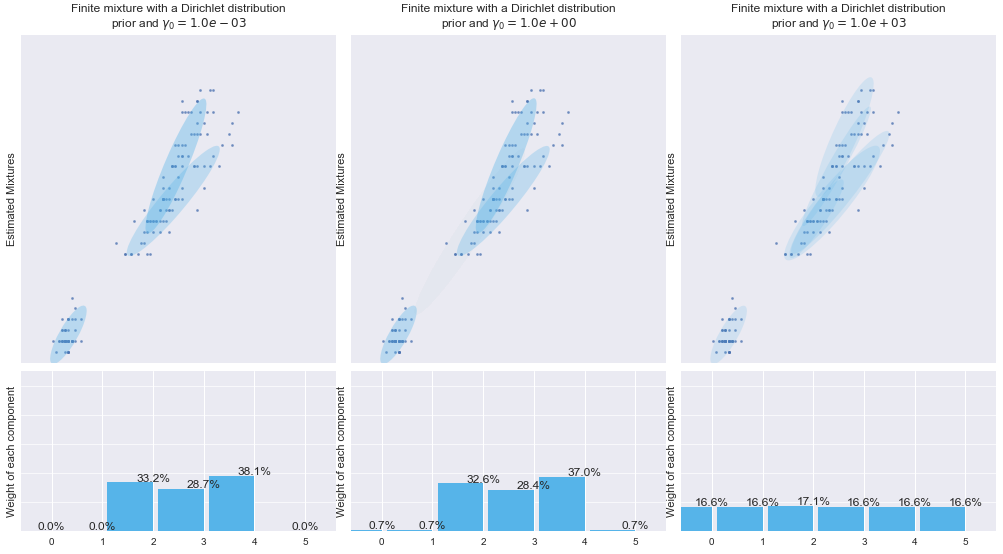

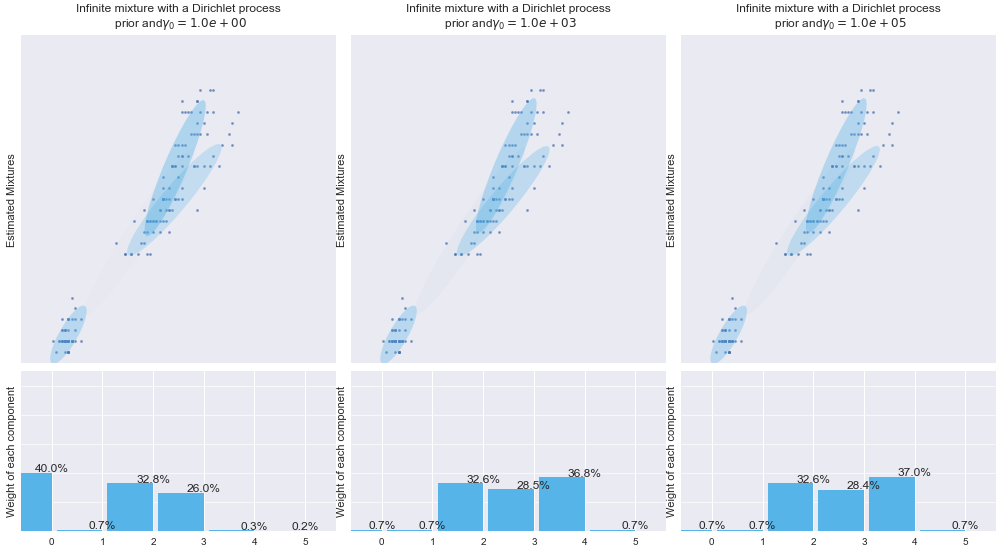

In [982]:

for (title, estimator, concentrations_prior) in estimators:
    plt.figure(figsize=(4.7 * 3, 8))
    plt.subplots_adjust(bottom=.04, top=0.90, hspace=.05, wspace=.05,
                        left=.03, right=.99)

    gs = gridspec.GridSpec(3, len(concentrations_prior))
    for k, concentration in enumerate(concentrations_prior):
        estimator.weight_concentration_prior = concentration
        estimator.fit(iris_array)
        plot_BayesGMM_results(plt.subplot(gs[0:2, k]), plt.subplot(gs[2, k]), estimator,
                    iris_array, r"%s$%.1e$" % (title, concentration),
                     10, 3)
plt.show()

## Old Faithful Dataset

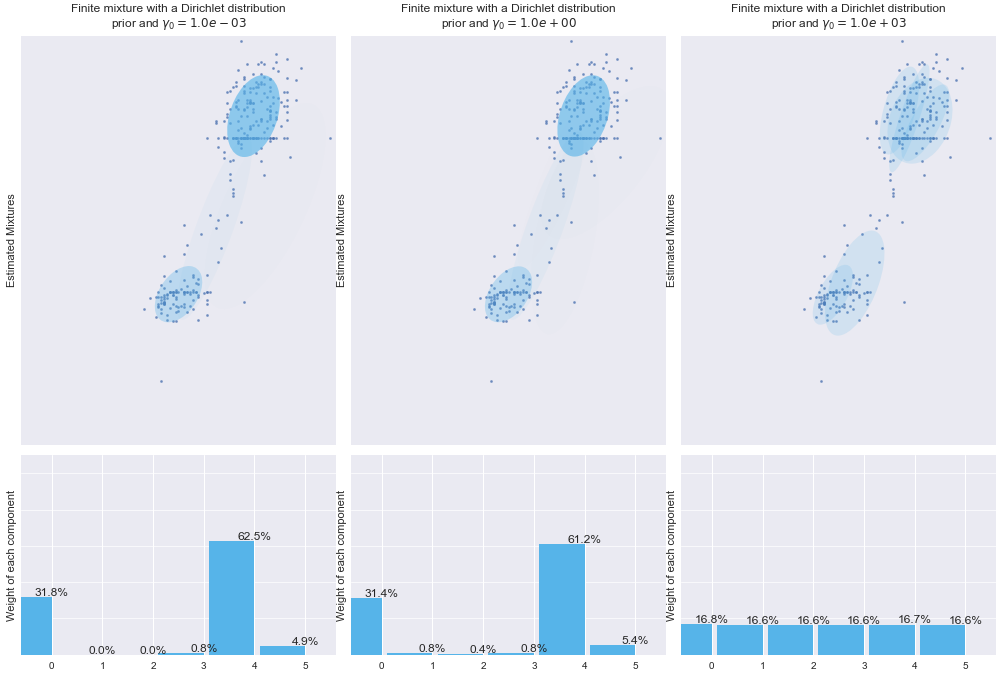

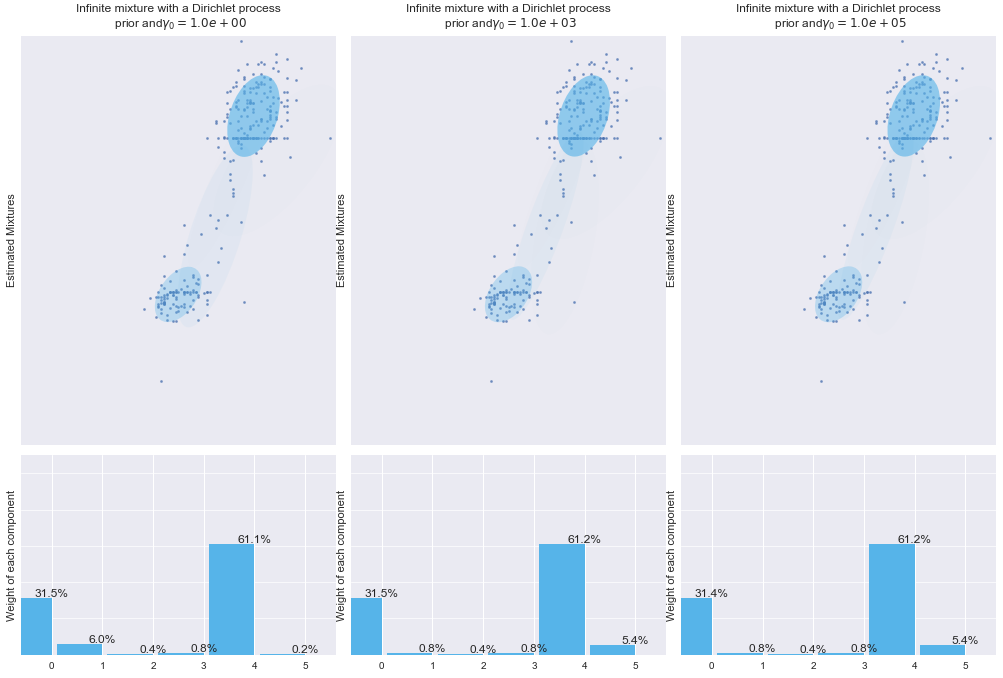

In [983]:
#scale(oldarray)

for (title, estimator, concentrations_prior) in estimators:
    plt.figure(figsize=(4.7 * 3, 10))
    plt.subplots_adjust(bottom=.04, top=0.90, hspace=.05, wspace=.05,
                        left=.03, right=.99)

    gs = gridspec.GridSpec(3, len(concentrations_prior))
    for k, concentration in enumerate(concentrations_prior):
        estimator.weight_concentration_prior = concentration
        estimator.fit(oldarray)
        plot_BayesGMM_results(plt.subplot(gs[0:2, k]), plt.subplot(gs[2, k]), estimator,
                    oldarray, r"%s$%.1e$" % (title, concentration),
                    110, 320)
plt.show()

## The Ruspini Dataset

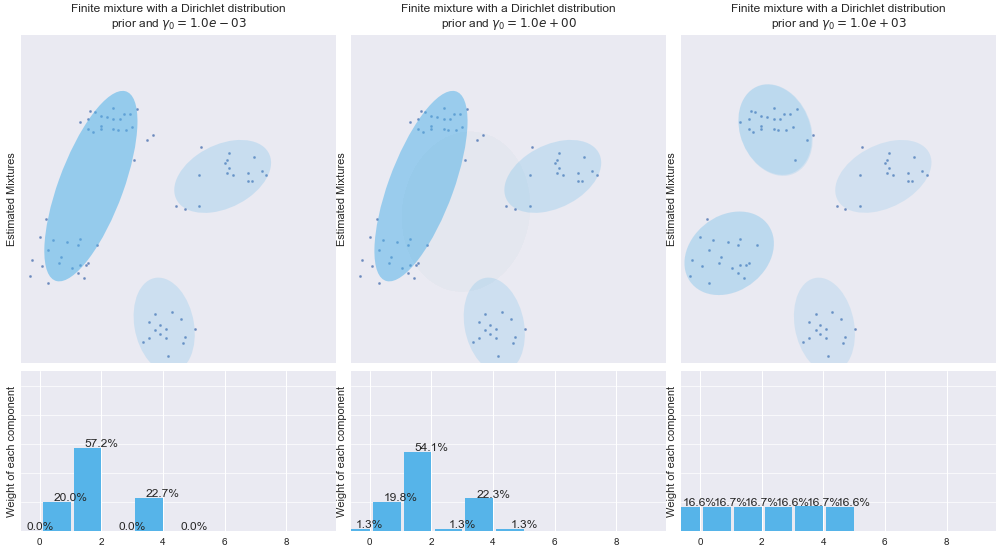

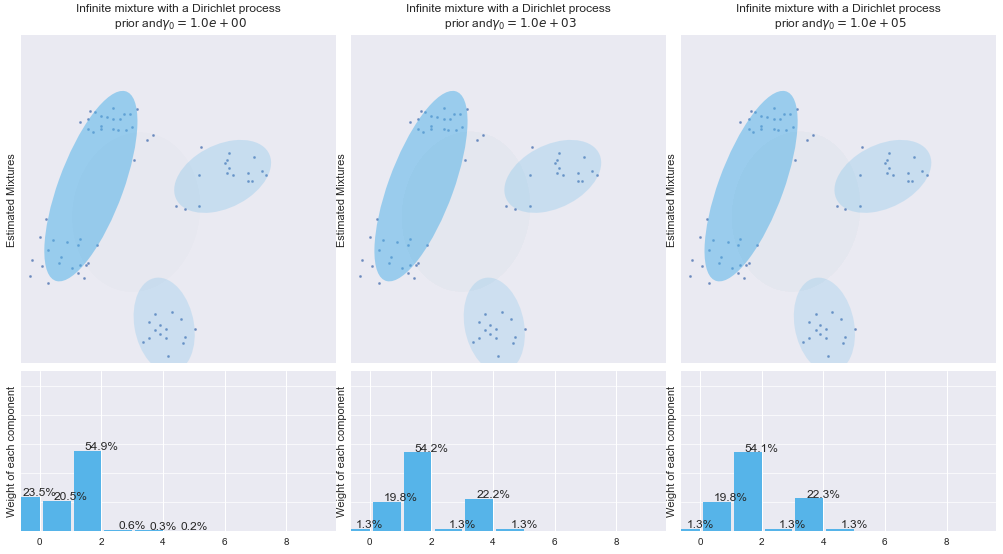

In [984]:
#rusparray = scale(rusparray)
n_components = 5
for (title, estimator, concentrations_prior) in estimators:
    plt.figure(figsize=(4.7 * 3, 8))
    plt.subplots_adjust(bottom=.04, top=0.90, hspace=.05, wspace=.05,
                        left=.03, right=.99)

    gs = gridspec.GridSpec(3, len(concentrations_prior))
    for k, concentration in enumerate(concentrations_prior):
        estimator.weight_concentration_prior = concentration
        estimator.fit(rusparray)
        plot_BayesGMM_results(plt.subplot(gs[0:2, k]), plt.subplot(gs[2, k]), estimator,
                    rusparray, r"%s$%.1e$" % (title, concentration),
                     150, 200)
plt.show()

A dataset with a small number of data points illustrates a weak point of Dirichlet process priors: it often tends to an over conservative estimate of the number of clusters and the two left hand clusters are being counted as one cluster.

# Conclusion

Finite sample effects. next project implement new criterion and test. The number of Gaussian components will not be equal to the number of components if each component is  non-Gaussian. Gaussain components close together should be counted as one nonGaussian component.

# Bibliography

1. Model Order Selection: A Review of Information Criterion Rules, P. Stoica, IEEE Signal Processing Magazine, 2004
*  The Variational Approximation for Bayesian Inference, D.G. Tzikas, IEEE Signal Processing Magazine, 2008
*  Pattern Recognition and Machine Learning, Christopher Bishop, 2004